<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

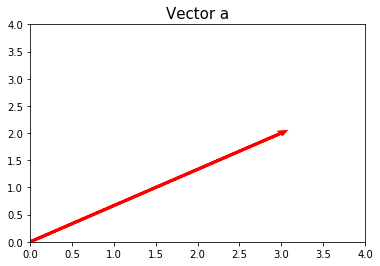

In [6]:
import numpy as np
import matplotlib.pyplot as plt

vec = [3,2]

# graph vector a
plt.arrow(0, 0, vec[0], vec[1], linewidth=3, head_width=.05, head_length=0.05, color ='R')
plt.xlim([0,4])
plt.ylim([0,4])
plt.title('Vector a', fontsize=15)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [11]:
# calculate norm
b = np.array([17, -4, -2, 1])
print('norm of b: ', np.linalg.norm(b))

Norm of b:  17.60681686165901


The norm of a vector is the vectors length. Also called Magnitude.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [14]:
def dot(a,b):
  '''function returns the dot product of two arrays (a,b) and if orthogonal, must have numpy installed'''
  if a.dot(b) == 0:
    print('Vectors are orthogonal dot product = ', a.dot(b))
  else:
    print('Vectors are not orthogonal dot product = ', a.dot(b))
    
    
c = np.array([3, 7, -2, 12])

d = np.array([9, -7, 4, 6])
dot(c,d)

Vectors are not orthogonal dot product =  42


For a dot product to be orthogonal the dot product must equal zero

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [23]:
# declare E
E = np.array([[7, 4, 2],
             [1, 3, -1],
             [2, 6, -4]])

# calculate inverse
inv_E = np.linalg.inv(E)

# calculate transpose
TE = E.transpose()

# return answers
print('Inverse of E:\n', inv_E)
print('Transpose of E:\n', TE)

Inverse of E:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transpose of E:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [24]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
def MeVarStd(array):
  '''This function calculates the Mean, Varience, and Standard Deviation of an array'''
  
  # Gather necessary values  
  mean = sum(array) / len(array)
  observations = len(array)
  dist_sq = []
  
  # for loop to fill dist_sq  
  for i in array:   
    dist_sq.append((i - mean)**2)
  
  # Calculate Varience and Std   
  varience = sum(dist_sq)/observations
  std = varience**.5
  
  # Output  
  print('Mean: ', f'{mean:.5f}')
  print('Varience: ', f'{varience:.5f}')
  print('Standard of Deviation: ', f'{std:.5f}')

In [27]:
# Mean, Varience, Standard of Deviation for Customers
MeVarStd(df['customers'])

Mean:  1135.71429
Varience:  84653.06122
Standard of Deviation:  290.95199


In [28]:
# Mean, Varience, Standard of Deviation for Snow
MeVarStd(df['snow'])

Mean:  2.71429
Varience:  7.34694
Standard of Deviation:  2.71052


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Not currently because they have not been standardized yet, meaning we must divide each by their means

In [0]:
def covar(m,y):
  '''This function calculates the covarience of two arrays of the same size (m, y)'''
  
  # Gather necessary values  
  m_mean = sum(m) / len(m)
  y_mean = sum(y) / len(y)
  observations = len(m)
  m_dist = []
  y_dist = []
  
  # for loop to fill m_dist  
  for i in m:   
    m_dist.append(i - m_mean)
    
  # for loop to fill y_dist 
  for x in y:
    y_dist.append(x - y_mean)
  
  dist = [a*b for a,b in zip(m_dist,y_dist)]
  
  # Calculate covarience
  covarience = sum(dist)/(observations-1)
    
  # Output  
  # print('Observations: ', observations)
  # print('m_mean: ', f'{m_mean:.5f}') 
  # print('y_mean: ', f'{y_mean:.5f}') 
  # print('m_dist: ', m_dist) 
  # print('y_dist: ', y_dist)
  # print('dist: ', dist)
  # print('covarience: ', f'{covarience:.5f}') 
  return covarience

In [31]:
covar(df['snow'], df['customers'])

670.2380952380953

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [29]:
# find varience-covariance matrix
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


The variance-covariance matrix shows the Covariance between features (snow and customers), and along the diagonal it shows the Variance of Customers and Snow.

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [59]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [33]:
# drop non numeric parameters from dataframe
df_data = df.drop('Country', axis=1)
df_data.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
# fit scaled features into dataframe
scaled_features = StandardScaler().fit_transform(df_data.values)
sf_df = pd.DataFrame(scaled_features, index=df_data.index, columns=df_data.columns)

sf_df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [50]:
# Mean is not equal to one, this happened in class but I forgot how to change it
sf_df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [51]:
# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(sf_df)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n", pca.explained_variance_)

# transform data
B = pca.transform(sf_df)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[-0.24572131  0.28562914 -0.26481055 -0.28611787 -0.12719487 -0.2811012
   0.09775901 -0.26544997 -0.28708628 -0.12073819 -0.25767815 -0.27890521
  -0.17843996 -0.27747513  0.22771961 -0.25509484 -0.25275834]
 [ 0.24708041 -0.07716993  0.13610704 -0.01100602 -0.40054501 -0.13684092
  -0.45468785 -0.0964863  -0.09282322  0.41036129 -0.1539603   0.08174644
  -0.32902948 -0.13773847  0.29323981  0.23231808  0.21105701]]

 Eigenvalues: 
 [15.48765084  5.63749203]

 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


In [52]:
# turn projected data into a dataframe
df1 = pd.DataFrame(B)
df1 = df1.rename(columns={0:'x1', 1:'x2',2:'x3'})
df1.head()

,x1,x2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


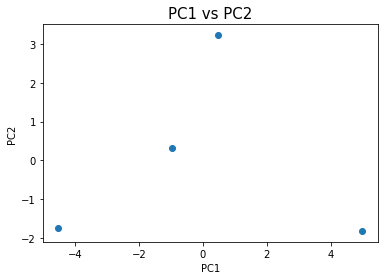

In [56]:
# plot pricipal components
plt.scatter(df1['x1'], df1['x2'])
plt.title('PC1 vs PC2', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
import seaborn as sns

In [0]:
plt.style.use('fivethirtyeight')

In [60]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
print(points.shape)
points.head()

(200, 2)


,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# gather sum of squared distances for elbow graph
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

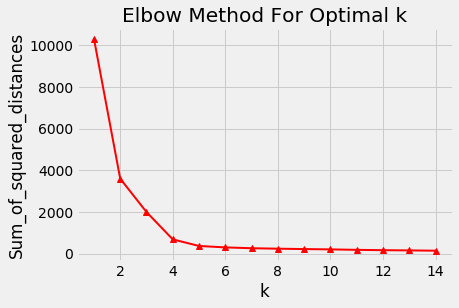

In [99]:
# elbow graph to determine num of clusters
plt.plot(K, sum_of_squared_distances, linewidth=2, color='r', linestyle='-', marker='^')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Because the slope of the line drops below 1 at 4, I can infer that the majority of the varience in this data can be summarized in 4 clusters.

In [69]:
# create clusters from KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 1 3 1 1 3 3 0 1 1 1 1 1 3 1 3 1 1 2 3 2 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 0 1 1 2 0 0 0 1 1 1 3 1 2 3 3 0 2 1 1 0 0 3 2 1 3 0 2 0 2 0 3 0 1 1 1 1
 2 2 1 1 0 2 0 1 1 1 0 1 0 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 3 3 3 2 1
 2 1 3 1 1 0 0 2 0 2 1 1 3 1 3 1 2 0 3 1 3 1 3 0 0 1 2 3 1 0 1 1 2 1 0 1 0
 3 1 1 1 3 2 1 0 1 2 1 3 1 1 0 3 2 2 1 0 1 1 3 1 0 2 1 1 1 1 1 3 1 1 1 1 1
 1 3 2 0 1 1 3 2 3 1 0 2 2 1 1]


In [65]:
# add cluster labels to dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values
points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


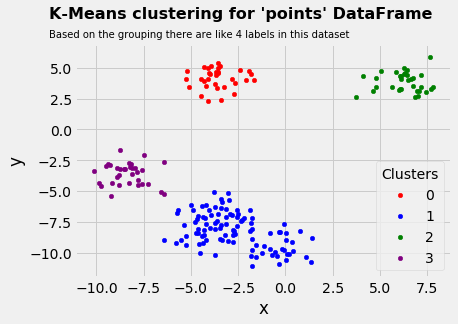

In [104]:
# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green', 3:'purple'}
fig, ax = plt.subplots()
grouped = points.groupby('clusters')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.legend(title='Clusters')
plt.text(x=-12.5, y=9, fontsize=16, fontweight='bold',
        s = "K-Means clustering for 'points' DataFrame")
plt.text(x=-12.5, y=7.5, fontsize=10,
        s = 'Based on the grouping there are likely 4 labels in this dataset')
plt.show()